In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [25]:
mf=pd.read_csv('model_u0_mean_.csv')

mf['srcuid_']=["#".join(x.split('#')[:-1])+'#' for x in mf.src]
mf['tgtuid_']=["#".join(x.split('#')[:-1])+'#' for x in mf.tgt]

mf['src_']=[x.split('#')[-1] for x in mf.src]
mf['tgt_']=[x.split('#')[-1] for x in mf.tgt]
mf=mf[['src_','tgt_','srcuid_','tgtuid_','delay','gamma','mass']]

In [26]:
mf=mf[mf.srcuid_==mf.tgtuid_]

In [27]:
VARNAMES=mf.src_.value_counts().index.values

In [28]:
VARNAMES

array(['popFrac', 'visitors', 'singles', 'MeetFrac', 'meetingPairs',
       'Dist', 'SiteTypeRecreationalSite', 'fracFriends',
       'SiteTypeRestaurant', 'myFriends', 'myFriendsR'], dtype=object)

Text(0.5, 1.0, 'tgt')

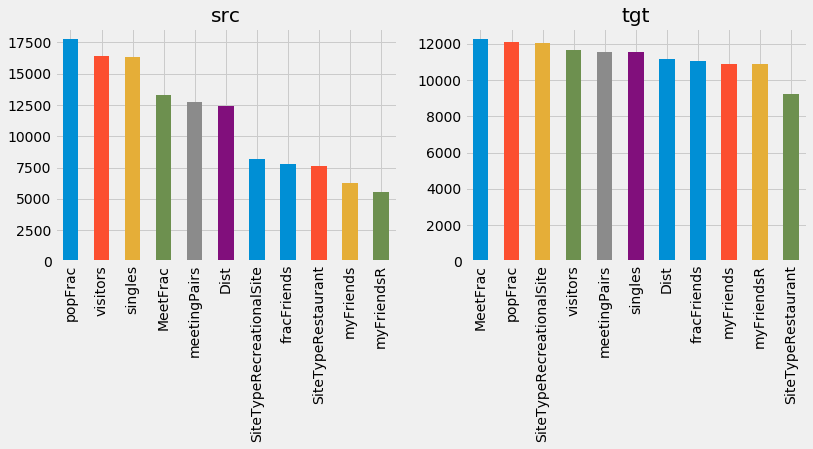

In [29]:
#print(mf.src_.value_counts())
fig=plt.figure(figsize=[12,4])
plt.subplot(121)
mf.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src')
plt.subplot(122)
mf.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt')

## Comment
---

> `popFrac, Dist, visitors, singles` are driving 
> a large proportion of the dynamics

# UID Stratification 

In [30]:
def readVarName(csvfile):
    return pd.read_csv(csvfile).varname.values

In [42]:
UVAR_lt=readVarName('left_town.csv')
UVAR_ls=readVarName('low_soc.csv')
UVAR_ms=readVarName('med_soc.csv')
UVAR_hs=readVarName('hig_soc.csv')
mf_ls=mf[mf.srcuid_.isin(UVAR_ls)]
mf_ms=mf[mf.srcuid_.isin(UVAR_ms)]
mf_hs=mf[mf.srcuid_.isin(UVAR_hs)]
mf_lt=mf[mf.srcuid_.isin(UVAR_lt)]



Text(0.5, 1.0, 'src: left')

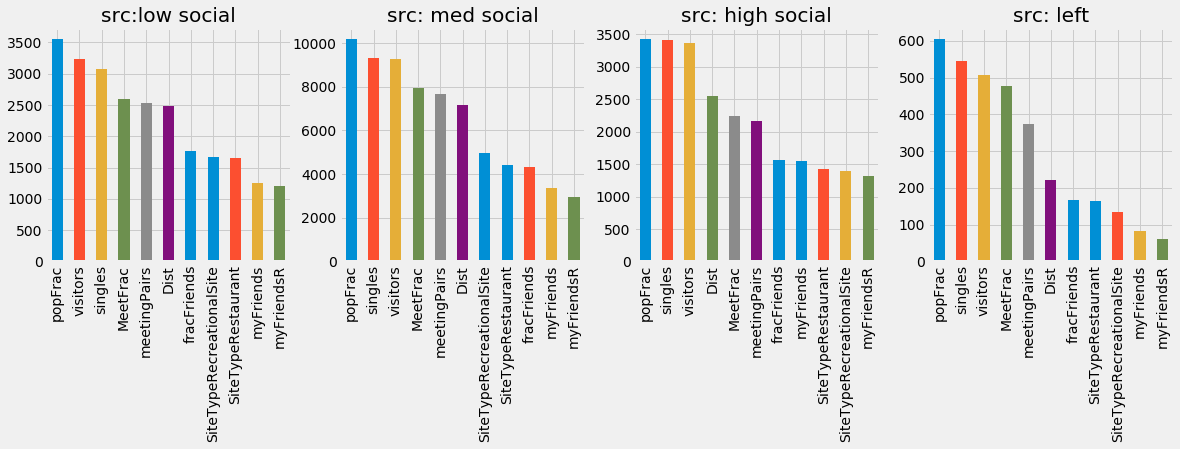

In [44]:
fig=plt.figure(figsize=[18,4])
plt.subplot(141)
mf_ls.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src:low social')
plt.subplot(142)
mf_ms.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src: med social')
plt.subplot(143)
mf_hs.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src: high social')
plt.subplot(144)
mf_lt.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src: left')


Text(0.5, 1.0, 'tgt: left')

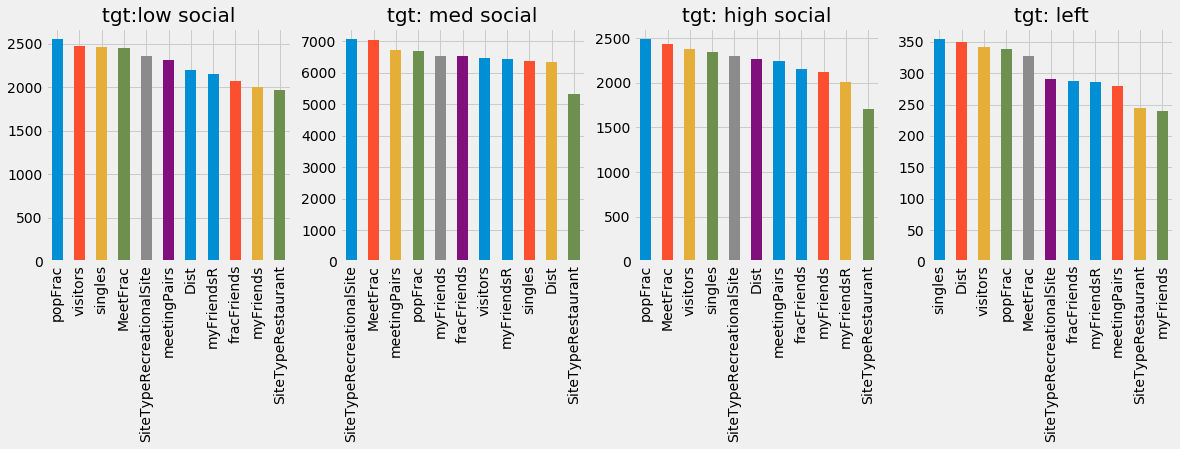

In [45]:
fig=plt.figure(figsize=[18,4])
plt.subplot(141)
mf_ls.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt:low social')
plt.subplot(142)
mf_ms.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt: med social')
plt.subplot(143)
mf_hs.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt: high social')
plt.subplot(144)
mf_lt.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt: left')


In [81]:
def getRelationships(MF,VAR,HIGAMMA=.7,D1=26,D2=52,D3=100,SELF=False):
    gf=MF[(MF.tgt_==VAR) & (mf.gamma>HIGAMMA) ]
    D1=26
    D2=52
    D3=100
    if not SELF:
        XX=VAR
    else:
        XX='xx'

    sf=gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].groupby('src_').median()
    sf['Count']=gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].src_.value_counts()
    display(sf.sort_values('gamma',ascending=False).style.applymap(color_negative_red).apply(highlight_max))
    #print(gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].sort_values('src_'))

    sf=gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].groupby('src_').median()
    sf['Count']=gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].src_.value_counts()
    display(sf.sort_values('gamma',ascending=False).style.applymap(color_negative_red).apply(highlight_max))
    #print(gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].sort_values('src_'))

    sf=gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].groupby('src_').median()
    sf['Count']=gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].src_.value_counts()
    display(sf.sort_values('gamma',ascending=False).style.applymap(color_negative_red).apply(highlight_max))
    #print(gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].sort_values('src_'))

    return 
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def getDep(VAR='SiteTypeRecreationalSite',GAMMA=.2):
    printmd('# *'+VAR+'*')

    printmd('## **Low Social**')
    getRelationships(MF=mf_ls,VAR=VAR,HIGAMMA=GAMMA,SELF=True)
    printmd('## **Medium Social**')
    getRelationships(MF=mf_ms,VAR=VAR,HIGAMMA=GAMMA,SELF=True)
    printmd('## **High Social**')
    getRelationships(MF=mf_hs,VAR=VAR,HIGAMMA=GAMMA,SELF=True)
    printmd('## **Leaving**')
    getRelationships(MF=mf_lt,VAR=VAR,HIGAMMA=GAMMA,SELF=True)
    return

In [82]:
getDep(VAR='SiteTypeRecreationalSite',GAMMA=.2)

# *SiteTypeRecreationalSite*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,1,0.361279,0.104023,3
MeetFrac,1.5,0.291021,0.097085,18
meetingPairs,1,0.286277,0.180766,15
singles,1,0.283438,0.168405,7
popFrac,1,0.275377,0.110559,26
myFriends,1,0.268842,0.130481,3
visitors,1.5,0.246074,0.124036,10
SiteTypeRecreationalSite,1.5,0.215287,0.0571556,6
myFriendsR,1,0.205796,0.127587,2


,delay,gamma,mass,Count
src_,,,,
popFrac,46.5,0.337261,0.134326,4
myFriends,47,0.320001,-0.0322581,3
MeetFrac,48,0.304346,0.217383,6
meetingPairs,48,0.29854,0.173939,5
visitors,46,0.294548,-0.0744242,1
SiteTypeRecreationalSite,46,0.264717,-0.0229594,1
fracFriends,48,0.214537,0.274553,2


,delay,gamma,mass,Count
src_,,,,
myFriends,95,0.313215,-0.0322581,3
fracFriends,96,0.271547,0.128089,1
MeetFrac,97,0.233045,0.198879,1
meetingPairs,96,0.222521,0.195373,1
SiteTypeRestaurant,59,0.21582,0.0408083,1
visitors,59,0.211564,0.0387444,1
singles,59,0.208318,0.0372346,1
popFrac,77,0.204005,-0.00525855,2


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
SiteTypeRestaurant,17,0.435456,0.0292958,2
meetingPairs,1,0.326036,0.177129,51
visitors,1,0.310028,0.204276,43
MeetFrac,1,0.308769,0.126726,64
popFrac,1,0.284857,0.108604,65
singles,1,0.284784,0.196373,44
myFriends,1,0.249521,0.210576,3
SiteTypeRecreationalSite,1,0.246309,0.190697,10
fracFriends,1.5,0.231733,0.178894,12


,delay,gamma,mass,Count
src_,,,,
MeetFrac,49,0.556867,0.100179,7
meetingPairs,48.5,0.500428,0.288625,6
popFrac,49,0.441196,0.191449,5
SiteTypeRestaurant,44,0.216869,0.0285553,1
singles,44,0.216869,0.0285553,1
visitors,44,0.216869,0.0285553,1


,delay,gamma,mass,Count
src_,,,,
MeetFrac,97,0.473428,0.0671988,7
meetingPairs,96,0.447552,0.394077,5
popFrac,60,0.365778,0.0905846,7
SiteTypeRestaurant,59,0.285564,0.0243572,2
singles,59,0.285564,0.0243572,2
visitors,59,0.285564,0.0243572,2


## **High Social**

,delay,gamma,mass,Count
src_,,,,
visitors,1,0.315081,0.16851,21
meetingPairs,1,0.314692,0.218044,18
popFrac,2,0.311113,0.0919491,23
MeetFrac,2,0.309128,0.115076,24
singles,1,0.306096,0.183905,20
myFriends,1,0.278486,0.135083,3
fracFriends,1,0.242549,0.0551456,2
SiteTypeRecreationalSite,1,0.235064,0.182308,5
myFriendsR,1,0.225431,0.132894,2


,delay,gamma,mass,Count
src_,,,,
meetingPairs,48,0.725983,0.740462,1
MeetFrac,48.5,0.47919,0.402508,2
popFrac,48.5,0.47755,0.337436,2
visitors,47.5,0.209788,0.096389,2


,delay,gamma,mass,Count
src_,,,,
meetingPairs,96,0.529809,0.573509,1
popFrac,96,0.356075,0.110549,3
MeetFrac,96,0.254645,0.0314286,3


## **Leaving**

,delay,gamma,mass,Count
src_,,,,
meetingPairs,1,0.370671,0.216901,1
visitors,5,0.3582,0.0312645,3
singles,7,0.333542,0.0451013,4
MeetFrac,2,0.312846,0.00833331,3
popFrac,2.5,0.278921,0.0656681,8
SiteTypeRecreationalSite,1,0.273375,0.120367,1


,delay,gamma,mass,Count
src_,,,,
meetingPairs,48,0.222134,0.0757713,1
MeetFrac,48,0.201652,0.0198672,1


,delay,gamma,mass,Count
src_,,,,
meetingPairs,61,0.226772,-0.0285178,1


In [83]:
getDep(VAR='SiteTypeRestaurant',GAMMA=.2)

# *SiteTypeRestaurant*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
MeetFrac,1,0.256881,0.0963122,1
SiteTypeRecreationalSite,1,0.253081,0.68253,1
visitors,15,0.252722,-0.0322031,3
popFrac,1,0.229645,0.0739639,1
singles,8.5,0.214799,0.0735543,2


,delay,gamma,mass,Count
src_,,,,
visitors,47,0.349677,-0.00499535,22
singles,48,0.325808,0.0795127,19
popFrac,48,0.320325,0.0784528,17
fracFriends,47.5,0.31113,0.0403116,4
myFriendsR,47.5,0.279649,0.0962317,2
myFriends,48,0.277939,0.222736,2
MeetFrac,47,0.256507,0.0550076,1
SiteTypeRestaurant,46,0.251199,0,1
Dist,46,0.229599,-0.0145631,4


,delay,gamma,mass,Count
src_,,,,
Dist,96,0.299651,-0.0291262,5
visitors,96,0.28531,0.0567305,12
popFrac,96,0.265863,0.0771303,9
singles,96,0.265023,0.0350551,13
myFriends,95.5,0.238849,0.0046055,2
fracFriends,96,0.201561,0.112255,1


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
MeetFrac,1.5,0.416486,0.00512239,2
meetingPairs,13,0.3375,0.000976462,1
popFrac,12,0.29718,-0.000320522,3
myFriends,13.5,0.286652,0.054809,2
visitors,1,0.261667,0.183061,5
singles,1,0.243555,0.0497016,4
myFriendsR,1,0.241774,0.174718,1
fracFriends,13,0.235956,0.0696786,3


,delay,gamma,mass,Count
src_,,,,
singles,48,0.339004,0.0838168,44
Dist,46,0.325024,-0.035461,11
myFriends,48,0.321107,0.0867686,4
visitors,47.5,0.309016,0.0148474,48
popFrac,48,0.306982,0.0639289,44
MeetFrac,47,0.261817,-0.00449841,5
fracFriends,47.5,0.249673,-0.00597885,4
meetingPairs,47,0.245481,-0.0776087,4
SiteTypeRestaurant,46,0.237803,0,5


,delay,gamma,mass,Count
src_,,,,
meetingPairs,98,0.323369,0.0292502,3
visitors,96,0.271638,0.110061,35
singles,96,0.261347,0.0880049,32
Dist,94,0.24453,-0.0496454,11
popFrac,96,0.235052,0.0777506,26
SiteTypeRestaurant,70,0.227866,0,5
myFriends,95,0.213836,-0.139535,3


## **High Social**

,delay,gamma,mass,Count
src_,,,,
singles,1,0.623807,0.249296,1
visitors,1,0.426731,0.199176,2


,delay,gamma,mass,Count
src_,,,,
meetingPairs,37,0.69052,0.0714285,5
MeetFrac,37,0.661558,0.0555556,5
SiteTypeRecreationalSite,35,0.590318,0.0294118,5
popFrac,45.5,0.370768,0.0172414,16
singles,46,0.358886,0.00554979,17
visitors,46,0.356183,0.0185185,15
fracFriends,48,0.313038,0.16414,1
myFriendsR,48,0.312837,0.167218,1
Dist,43.5,0.299866,0,4


,delay,gamma,mass,Count
src_,,,,
SiteTypeRecreationalSite,76,0.594278,0.0294118,1
visitors,96,0.328028,0.0985559,13
singles,96,0.321507,0.142491,12
popFrac,95,0.290281,0.0172414,9
myFriends,89.5,0.216023,0.104357,2
Dist,88,0.214986,0,6
SiteTypeRestaurant,70,0.210422,0,2


## **Leaving**

,delay,gamma,mass,Count


,delay,gamma,mass,Count
src_,,,,
myFriends,48,0.603521,0.299299,1
myFriendsR,48,0.592315,0.283083,1
fracFriends,48,0.582022,0.268529,1
MeetFrac,48,0.4808,0.149292,1
visitors,45,0.302999,0.105546,5
singles,47,0.301918,0.0850341,5
meetingPairs,35,0.269926,0.183505,3
popFrac,47,0.241691,0.0867396,3


,delay,gamma,mass,Count
src_,,,,
singles,95,0.266388,0.0968144,3
visitors,93,0.264244,0.103841,5
meetingPairs,82.5,0.25969,0.127558,2
popFrac,89.5,0.254777,0.0360732,2


In [84]:
getDep(VAR='myFriends',GAMMA=.2)

# *myFriends*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,1,0.335386,0.0744583,17
meetingPairs,1,0.312604,0.0878223,5
myFriends,1,0.310265,0.114873,3
popFrac,1,0.286519,0.0460774,10
singles,3.5,0.259154,0.0653944,4
myFriendsR,1,0.250779,0.109188,2
MeetFrac,1.5,0.222442,0.0336727,6
visitors,4,0.214263,0.0370843,5
SiteTypeRestaurant,11.5,0.21155,0,14


,delay,gamma,mass,Count
src_,,,,
myFriendsR,47.5,0.342475,0.024818,4
myFriends,47,0.313254,0.0184055,9
fracFriends,47.5,0.287609,0.108342,10
MeetFrac,47.5,0.285832,0.262409,2
popFrac,48,0.261311,0.100684,8
visitors,48,0.256553,0.112389,2
SiteTypeRestaurant,28,0.214555,0,3
SiteTypeRecreationalSite,39.5,0.209485,0,8
singles,47.5,0.207338,0.0642067,4


,delay,gamma,mass,Count
src_,,,,
SiteTypeRecreationalSite,94.5,0.310264,-0.0131579,4
fracFriends,95.5,0.286672,0.306037,4
meetingPairs,96,0.27288,0.0269702,1
singles,95,0.240675,0.0601361,5
visitors,79.5,0.236711,0.0345729,4
popFrac,95.5,0.232523,0.0766592,6
MeetFrac,96,0.227167,0.0744999,3
myFriends,95,0.217846,-0.133225,3
myFriendsR,94.5,0.217008,-0.151909,2


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,1,0.298965,0.142572,37
MeetFrac,1,0.282576,0.0375349,13
myFriendsR,1,0.275191,0.11268,9
myFriends,1,0.27023,0.219719,17
meetingPairs,1,0.24559,0.124147,16
singles,1,0.245093,0.0935172,9
popFrac,1,0.239389,0.0516563,15
SiteTypeRecreationalSite,1,0.234188,0.00194323,2
visitors,1,0.232824,0.0705804,9


,delay,gamma,mass,Count
src_,,,,
meetingPairs,45,0.662494,0.0555556,2
SiteTypeRecreationalSite,44,0.639658,0.0454545,2
visitors,47,0.491846,0.0119047,5
singles,47,0.430901,0.0121951,6
myFriends,48,0.269707,0.25967,2
popFrac,48,0.267765,0.110104,7
MeetFrac,48,0.255015,0.15178,3
myFriendsR,48,0.235741,0.239621,3
fracFriends,48,0.227271,0.249489,4


,delay,gamma,mass,Count
src_,,,,
meetingPairs,91.5,0.42541,0.0406848,2
fracFriends,96.5,0.320296,0.141781,2
popFrac,95,0.287131,0.0946377,3
singles,94.5,0.27284,-0.0458491,4
visitors,95.5,0.271763,0.0278005,4
Dist,96,0.257138,0.1245,1
MeetFrac,97.5,0.227179,0.153019,2
SiteTypeRestaurant,96,0.213865,0.190136,1


## **High Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,1,0.293673,0.144195,8
popFrac,1,0.285252,0.0896134,9
MeetFrac,1,0.281687,0.0578269,6
visitors,1.5,0.263112,0.110292,4
meetingPairs,1,0.259738,0.0599875,6
singles,2,0.239892,0.0996384,3
myFriendsR,1,0.236778,0.0638889,1
myFriends,1,0.217891,0.188406,5


,delay,gamma,mass,Count
src_,,,,
myFriends,47,0.261209,0.0518391,1
popFrac,47.5,0.229974,0.0937243,4
singles,47.5,0.2276,0.17408,2
meetingPairs,46,0.227373,-0.0244253,1
visitors,47.5,0.223803,0.26496,2
fracFriends,48,0.212503,0.258661,1


,delay,gamma,mass,Count
src_,,,,
popFrac,95,0.289251,0.0955612,3
singles,78,0.284915,0.0954492,2
myFriends,96,0.229143,0.37569,1
visitors,95,0.221905,0.103035,3
SiteTypeRestaurant,95,0.201061,0.234291,1


## **Leaving**

,delay,gamma,mass,Count
src_,,,,
MeetFrac,1,0.233371,0.0250787,1
fracFriends,2,0.222635,0.18717,1


,delay,gamma,mass,Count
src_,,,,
singles,47,0.407184,0.113692,3
meetingPairs,48,0.391714,0.09077,3
visitors,47.5,0.377692,-0.0319035,2
popFrac,47.5,0.325092,0.051579,2
MeetFrac,46.5,0.278188,-0.0909977,2


,delay,gamma,mass,Count
src_,,,,
visitors,96,0.316642,0.0964907,1
MeetFrac,95,0.316193,0.0428406,3
singles,95.5,0.29091,-0.0195032,2
popFrac,94.5,0.269169,0.0568469,4
meetingPairs,95,0.2668,-0.0835752,3


In [85]:
getDep(VAR='popFrac',GAMMA=.2)

# *popFrac*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,1,0.385967,-0.141796,1
meetingPairs,1,0.37301,0.0616855,2
popFrac,2,0.291394,0.126871,9
singles,1,0.274345,0.202649,3
visitors,1,0.264621,0.181928,4
MeetFrac,1.5,0.232023,0.118862,2


,delay,gamma,mass,Count
src_,,,,
MeetFrac,47.5,0.348298,0.164227,4
fracFriends,47.5,0.273941,0.233934,2
popFrac,47,0.253999,0.120773,12
singles,45.5,0.229685,-0.060122,4
visitors,46.5,0.22847,-0.0249553,2
myFriends,45,0.220238,-0.178801,1


,delay,gamma,mass,Count
src_,,,,
MeetFrac,96,0.319198,0.0389827,3
fracFriends,97,0.226269,0.459053,1
popFrac,95,0.218047,0.0649534,3
singles,93,0.202157,-0.0346483,2


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
fracFriends,2,0.467618,0.199793,3
popFrac,1,0.267195,0.154713,15
singles,1,0.257941,0.270884,16
visitors,1,0.251487,0.276778,16
SiteTypeRecreationalSite,1,0.24198,0.141779,1
meetingPairs,1,0.241518,0.183986,9
MeetFrac,1,0.237505,0.181831,8
myFriends,1,0.209154,0.159284,1


,delay,gamma,mass,Count
src_,,,,
MeetFrac,47.5,0.39007,-0.020544,2
meetingPairs,51,0.273093,0.16611,1
visitors,47,0.256081,-0.032637,11
singles,47.5,0.244372,0.128036,12
Dist,46.5,0.243712,0.111303,2
popFrac,47,0.240234,0.0768631,14


,delay,gamma,mass,Count
src_,,,,
popFrac,95.5,0.267772,0.0800405,4
visitors,96,0.242581,0.160173,1
singles,96,0.23874,0.161997,1


## **High Social**

,delay,gamma,mass,Count
src_,,,,
singles,1,0.40042,0.223735,6
popFrac,2,0.358805,0.113596,8
visitors,1,0.294575,0.24041,7
MeetFrac,1,0.277971,0.130665,3
meetingPairs,2,0.217756,0.173463,1


,delay,gamma,mass,Count
src_,,,,
Dist,48,0.307621,0.557044,1
singles,47,0.250757,0.033752,8
visitors,48,0.250168,0.186982,4
popFrac,47.5,0.226307,0.131552,6


,delay,gamma,mass,Count
src_,,,,
singles,95,0.293014,-0.0969945,3
visitors,95.5,0.255478,0.13975,2
popFrac,96,0.24038,0.184437,2


## **Leaving**

,delay,gamma,mass,Count


,delay,gamma,mass,Count
src_,,,,
MeetFrac,46,0.235286,-0.113267,5
popFrac,47.5,0.23176,-0.00072055,2
visitors,45.5,0.23138,-0.0489811,2
singles,46.5,0.221413,-0.0826226,4


,delay,gamma,mass,Count


In [86]:
getDep(VAR='visitors',GAMMA=.2)

# *visitors*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
popFrac,1,0.283285,0.156127,11
visitors,2,0.265401,0.198396,5
singles,1,0.261153,0.185202,7
MeetFrac,1,0.23448,0.223251,1
meetingPairs,1,0.210008,0.0804529,3


,delay,gamma,mass,Count
src_,,,,
SiteTypeRecreationalSite,47,0.441122,0.012987,3
myFriends,47,0.342796,0.015873,3
Dist,48,0.292269,0.121608,3
MeetFrac,48,0.274273,0.196183,1
visitors,48,0.270149,0.199786,8
popFrac,47,0.248735,0.033938,7
singles,47.5,0.237532,0.188622,6


,delay,gamma,mass,Count
src_,,,,
Dist,96,0.459254,-0.0388349,1
visitors,94.5,0.23609,-0.059249,2
singles,96,0.228195,0.141574,1
MeetFrac,96,0.226887,0.201103,1


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
visitors,1,0.303273,0.26485,28
singles,1,0.286968,0.2188,21
popFrac,1,0.269674,0.151178,24
fracFriends,1,0.261719,0.164153,1
MeetFrac,1,0.248126,0.240549,17
meetingPairs,1,0.247711,0.185541,13
SiteTypeRecreationalSite,5,0.216657,0.372109,1


,delay,gamma,mass,Count
src_,,,,
visitors,47,0.306341,0.0731303,19
singles,47,0.296733,0.0987432,20
popFrac,47.5,0.257503,0.0979576,12
Dist,48,0.218142,0.506208,1


,delay,gamma,mass,Count
src_,,,,
singles,96,0.24675,0.157553,3
visitors,95.5,0.243066,0.0767736,4
Dist,96,0.237407,0.219872,1
popFrac,96,0.228087,0.154119,3


## **High Social**

,delay,gamma,mass,Count
src_,,,,
MeetFrac,1.5,0.292666,0.206249,6
SiteTypeRecreationalSite,1,0.275159,0.0818173,1
singles,1,0.273294,0.188256,12
popFrac,2,0.271534,0.132316,15
visitors,1,0.259384,0.257545,9
myFriends,3,0.240372,0.367527,1
fracFriends,1,0.237738,0.272761,1
meetingPairs,1,0.207421,0.263872,4


,delay,gamma,mass,Count
src_,,,,
MeetFrac,40.5,0.645166,0.0335723,2
popFrac,47,0.244037,0.116284,3
visitors,47,0.228628,-0.0254603,7
singles,47,0.227524,0.107253,5


,delay,gamma,mass,Count
src_,,,,
meetingPairs,53,1,0,1
singles,96,0.247005,0.158569,1
visitors,96,0.24697,0.194845,3
popFrac,96,0.211869,0.240422,1


## **Leaving**

,delay,gamma,mass,Count
src_,,,,
meetingPairs,12,0.21689,-0.10161,1
visitors,12,0.209751,-0.0646885,1
singles,12,0.203409,-0.00590591,1


,delay,gamma,mass,Count
src_,,,,
visitors,48,0.29192,0.0870488,1
meetingPairs,47.5,0.262228,0.00091395,2
singles,46,0.251814,-0.121987,1
MeetFrac,48.5,0.240299,0.102277,2


,delay,gamma,mass,Count


In [87]:
getDep(VAR='Dist',GAMMA=.2)

# *Dist*

## **Low Social**

,delay,gamma,mass,Count
src_,,,,
meetingPairs,1,0.423419,0.113353,3
singles,1,0.394199,0.171675,2
visitors,1,0.344118,0.135515,5
fracFriends,1.5,0.343949,0.0600165,2
popFrac,1,0.328598,0.125383,4
MeetFrac,2,0.242233,0.0688497,3


,delay,gamma,mass,Count
src_,,,,
MeetFrac,48,0.402946,0.216888,1
SiteTypeRestaurant,48,0.343331,0.5618,1
fracFriends,47,0.30521,0.310123,3
popFrac,48,0.288708,0.132569,14
visitors,48,0.273793,0.19227,8
singles,47,0.272682,-0.053506,9
myFriends,48,0.262744,0.291919,1
myFriendsR,48,0.260842,0.28797,1
Dist,47.5,0.251807,0.111908,4


,delay,gamma,mass,Count
src_,,,,
Dist,92,0.288448,-0.106475,1
MeetFrac,96,0.267817,0.170471,3
SiteTypeRestaurant,96,0.250055,0.466026,1
popFrac,96,0.23017,0.173044,6
fracFriends,96.5,0.230077,0.190149,2
visitors,94,0.227305,-0.0620821,5
singles,95.5,0.218044,0.0239003,4


## **Medium Social**

,delay,gamma,mass,Count
src_,,,,
myFriendsR,1,0.62308,0.0184768,2
fracFriends,1.5,0.442377,0.185684,4
visitors,1,0.42924,0.218352,18
SiteTypeRestaurant,1,0.41041,0.346527,1
singles,1,0.405613,0.190337,20
myFriends,1,0.278499,0.241272,3
meetingPairs,1,0.276447,0.193731,10
MeetFrac,2,0.276004,0.074189,5
SiteTypeRecreationalSite,1,0.271167,0.290164,3


,delay,gamma,mass,Count
src_,,,,
SiteTypeRestaurant,48,0.275302,0.40322,2
visitors,48,0.25977,0.156172,27
singles,48,0.252136,0.116638,31
popFrac,48,0.233907,0.11743,33
Dist,47.5,0.231342,0.151132,6
meetingPairs,47,0.212947,-0.185764,3


,delay,gamma,mass,Count
src_,,,,
popFrac,96,0.315238,0.16525,5
Dist,88.5,0.239083,0,4
singles,96,0.231244,0.123872,6
visitors,96,0.213039,0.150917,8


## **High Social**

,delay,gamma,mass,Count
src_,,,,
SiteTypeRecreationalSite,1,0.395654,0.293705,3
singles,1,0.388255,0.181148,10
visitors,1,0.279897,0.113614,13
popFrac,1,0.263964,0.103144,5
fracFriends,1,0.245211,0.157231,1
myFriendsR,1,0.238462,0.115299,1
myFriends,1,0.234404,0.0933062,2
meetingPairs,1,0.220597,0.139774,1
MeetFrac,3,0.218705,0.0233142,1


,delay,gamma,mass,Count
src_,,,,
popFrac,48,0.244219,0.0693665,6
singles,48,0.241712,0.0586887,11
visitors,48,0.234434,0.111811,10
MeetFrac,46,0.222611,-0.0680638,1


,delay,gamma,mass,Count
src_,,,,
popFrac,96,0.27283,0.624691,1
visitors,95.5,0.228788,0.150442,6
singles,96,0.222033,0.193526,5
SiteTypeRestaurant,61,0.204651,0,1


## **Leaving**

,delay,gamma,mass,Count


,delay,gamma,mass,Count
src_,,,,
MeetFrac,48,0.333428,0.0592732,1
visitors,48,0.332797,0.109035,1
popFrac,48,0.299714,0.105798,1
singles,48,0.295574,0.184532,1
meetingPairs,48,0.230248,0.0850446,1


,delay,gamma,mass,Count
src_,,,,
MeetFrac,96,0.271027,0.144847,1
singles,96,0.236779,0.0400439,1
meetingPairs,94,0.217334,-0.103461,1
